In [161]:
from os import listdir
import os.path
from skimage import io
from skimage.transform import resize
import numpy as np
import matplotlib.pyplot as plt

In [164]:
names = []
shapes = []
path = r'c:\Users\ajax\Desktop\a2_contact\full_images'
for f in filter( lambda x: x.lower().endswith( 'jpg'),  listdir( path ) ):
    try:
        im = io.imread( os.path.join( path, f ) )
        names.append( f )
        shapes.append( im.shape )
    except Exception as e:
        print( e )
    
shapes = np.array( shapes )
print( shapes[:,0].mean(), shapes[:,1].mean() )

3389.40625 3390.09375


In [165]:
for i, name in enumerate( names ):
    print( shapes[i, 0], shapes[i,1], 320 * shapes[i, 0] / shapes[i,1], name )

3452 3453 319.907326962062 IMG_1698.JPG
3456 3457 319.9074341914955 IMG_1699.JPG
3456 3458 319.8149219201851 IMG_1705.JPG
3456 3457 319.9074341914955 IMG_1706.JPG
3456 3457 319.9074341914955 IMG_1707.JPG
3456 3458 319.8149219201851 IMG_1708.JPG
3456 3458 319.8149219201851 IMG_1710.JPG
3456 3458 319.8149219201851 IMG_1711.JPG
3436 3434 320.18637157833433 IMG_1712.JPG
3456 3457 319.9074341914955 IMG_1714.JPG
3456 3453 320.2780191138141 IMG_1716.JPG
3456 3457 319.9074341914955 IMG_1719.JPG
3452 3453 319.907326962062 IMG_1723.JPG
3456 3457 319.9074341914955 IMG_1724.JPG
3456 3457 319.9074341914955 IMG_1725.JPG
3456 3457 319.9074341914955 IMG_1726.JPG
3456 3457 319.9074341914955 IMG_1727.JPG
3456 3457 319.9074341914955 IMG_1731.JPG
3456 3457 319.9074341914955 IMG_1732.JPG
3456 3457 319.9074341914955 IMG_1733.JPG
3456 3457 319.9074341914955 IMG_1734.JPG
3456 3457 319.9074341914955 IMG_1736.JPG
3166 3171 319.49542730999684 IMG_1738.JPG
3456 3457 319.9074341914955 IMG_1739.JPG
3456 3457 319.90

A4 measures 210 × 297 millimeters

In [13]:
images_grid = ( 4, 8 )
a4_mm = ( 210, 297 )

a4_aspect_ratio = a4_mm[1]/a4_mm[0]
print( 'a4_aspect_ratio', a4_aspect_ratio )

full_image_pixels = tuple( 10 * x for x in a4_mm )
print( full_image_pixels[1], full_image_pixels[0] )

print( 'approx width per image', full_image_pixels[1] / images_grid[1] )
print( 'approx height per image', full_image_pixels[0] / images_grid[0] )
print( 'approx ar', (a4_width_pixels / 8) / ( a4_height_pixels / 4 ) )
print( 3456 * .7 )

a4_aspect_ratio 1.4142857142857144
2970 2100
approx width per image 371.25
approx height per image 525.0
approx ar 0.7071428571428572
2419.2


(512, 512, 4)


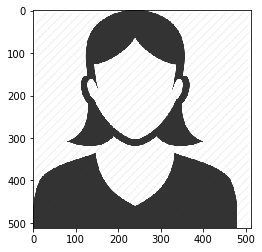

In [70]:
cim = io.imread( r'c:\Users\ajax\Desktop\a2_contact\full_images\girl-512.png' )
print( cim.shape )
plt.imshow( cim )
plt.show()

In [153]:
im_dim = [ 400, 300 ]
im_diff = ( 50, 50 )
im_border = [0,0]
border_ratio = [.8,.5 ]

for i in [0,1]:
    im_border[i] = int( border_ratio[i] * (full_image_pixels[i] - ( im_dim[i] * images_grid[i] + im_diff[i] * (images_grid[i] - 1) ))  )
    print( im_dim[i], im_diff[i], im_border[i] )
    print( im_dim[i] * images_grid[i] + im_diff[i] * ( images_grid[i] - 1 ) + im_border[i] * 2  )

400 50 280
2310
300 50 110
2970


C:\ProgramData\Anaconda3\lib\site-packages\skimage\transform\_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "


(400, 300, 3)


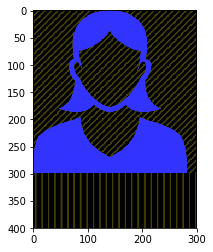

In [154]:
cim_res = resize( cim, [ im_dim[1], im_dim[1] ] )[:,:,1:4]
expander = np.expand_dims( cim_res[:,-1,:], axis=0 )
cim_res = np.insert( cim_res, [ im_dim[1] for i in range( im_dim[0] - im_dim[1] ) ] , expander, axis = 0) # np.append( cim_res, expander, axis=0 )
print( cim_res.shape )
plt.imshow( cim_res ); plt.show()

In [157]:
full_im = np.ones( ( full_image_pixels[0], full_image_pixels[1], 3 ) )
print( full_im.shape, full_im.dtype )
for y in range( images_grid[0] ):
    y_start = y * (im_dim[0] + im_diff[0]) + im_border[0]
    y_end = y_start + im_dim[0]
    for x in range( images_grid[ 1 ] ):
        x_start = x * (im_dim[1] + im_diff[1]) + im_border[1]
        x_end = x_start + im_dim[1]
        print( y_start, y_end, x_start, x_end )
        full_im[ y_start : y_end, x_start : x_end ] = 1 - cim_res

(2100, 2970, 3) float64
280 680 110 410
280 680 460 760
280 680 810 1110
280 680 1160 1460
280 680 1510 1810
280 680 1860 2160
280 680 2210 2510
280 680 2560 2860
730 1130 110 410
730 1130 460 760
730 1130 810 1110
730 1130 1160 1460
730 1130 1510 1810
730 1130 1860 2160
730 1130 2210 2510
730 1130 2560 2860
1180 1580 110 410
1180 1580 460 760
1180 1580 810 1110
1180 1580 1160 1460
1180 1580 1510 1810
1180 1580 1860 2160
1180 1580 2210 2510
1180 1580 2560 2860
1630 2030 110 410
1630 2030 460 760
1630 2030 810 1110
1630 2030 1160 1460
1630 2030 1510 1810
1630 2030 1860 2160
1630 2030 2210 2510
1630 2030 2560 2860


(2100, 2970, 3)


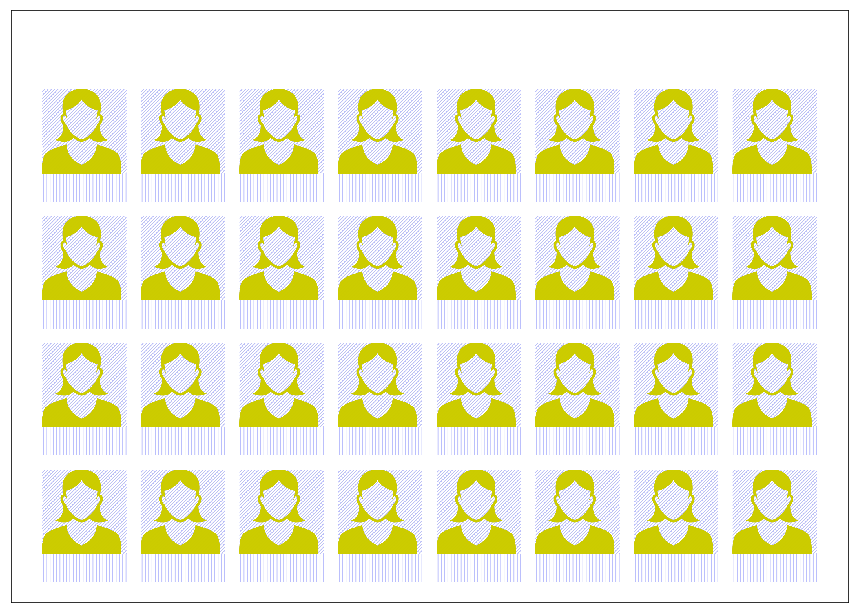

In [166]:
print( full_im.shape )
plt.figure( figsize=(15,15))
plt.gca().axes.get_yaxis().set_visible(False)
plt.gca().axes.get_xaxis().set_visible(False)
plt.imshow( full_im )